# Introduction

Importing Dependencies

In [1]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
# Path to your data directory
source_directory = "D:\AIML Projects\ProdigalAI\Course Notebooks\Data Imbalance\Data Augmentation\cats\*.jpeg"

In [3]:
glob.glob(source_directory)
# Storing images in the form of an array inside a list
images = [plt.imread(image) for image in glob.glob(source_directory)]

In [4]:
len(images) # Number of original images

5

Plotting Original Images 

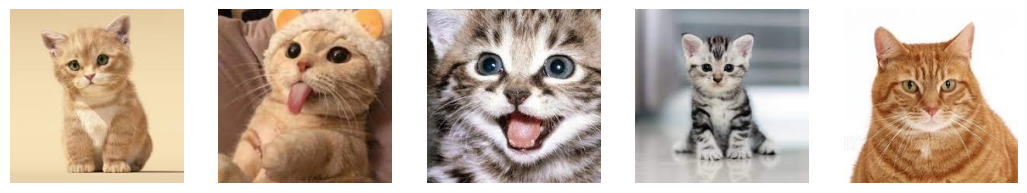

In [5]:
fig = plt.figure(figsize=(13, 5))
rows, cols = 1, 5 # rows and col can be changed to plot different number of images
for i in range(0, cols*rows):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(images[i])
  plt.axis("off")
plt.show()

# Data Augmentation using Keras

Image Data Generator

In [6]:
datagen = ImageDataGenerator(
                rotation_range = 45,      # andom rotation between 0 and 45
                width_shift_range = 0.2,  # % width shift
                height_shift_range = 0.2, # % height shift
                shear_range = 0.2,        # Shear Intensity
                zoom_range = 0.2,         # Zoom Intensity
                horizontal_flip = True,   # Randomly flip inputs horizontally
                fill_mode = 'nearest')    # Also try constant, reflect, wrap
# Refer to the link for more and in-depth explanation of the parameters
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Defining target directory for saving Augmented Images

In [7]:
target_directory = "D:\AIML Projects\ProdigalAI\Course Notebooks\Data Imbalance\Data Augmentation\Augmented_Images"

In [8]:
X = 5 # Number of images to be generated per image

Saving Images to target directory

In [9]:
for image in glob.glob(source_directory):
    image = load_img(image)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    imgen = datagen.flow(image, batch_size = 2, save_to_dir = target_directory, save_prefix = "AUG", save_format = "jpeg")
    for i in range(X):
        batch = imgen.next()

In [10]:
# Storing augmented images in the form of an array inside a list
aug_images = [plt.imread(image) for image in glob.glob(target_directory + "\*.jpeg")]

In [11]:
len(aug_images) # Number of augmented images = Number of original images * X

25

Plotting Augmented Images 

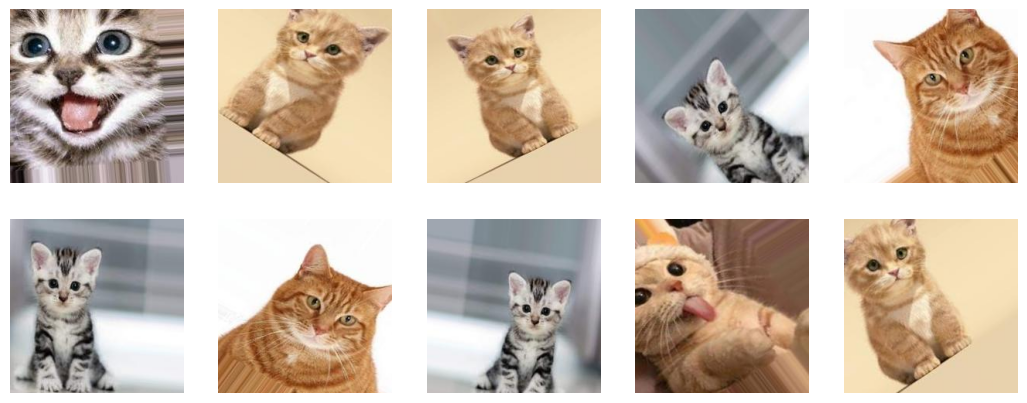

In [27]:
fig = plt.figure(figsize=(13, 5))
rows, cols = 2, 5 # rows and col can be changed to plot different number of images
aug_images = shuffle(aug_images)
for i in range(0, cols*rows):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(aug_images[i])
  plt.axis("off")
plt.show()